# Use a pretrained model from from Keras
Import weight matrices from HDF5-files exported from Keras/Tensorflow

### Keras/Tensorflow side:

```Python
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow import keras

mdl = VGG16(weights="imagenet")
mdl.save_weights("vgg16keras.h5", save_format="h5")
```

... that's it.

In [1]:
using HDF5
using Knet, CUDA
using Images, Colors
using NNHelferlein
using Augmentor

In [2]:
model_file = joinpath(NNHelferlein.DATA_DIR, "pretrained", "vgg16keras.h5")
h = h5open(model_file)

🗂️ HDF5.File: (read-only) /home/andreas/.julia/dev/NNHelferlein/data/pretrained/vgg16keras.h5
├─ 🏷️ backend
├─ 🏷️ keras_version
├─ 🏷️ layer_names
├─ 📂 block1_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block1_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block1_pool
│  └─ 🏷️ weight_names
├─ 📂 block2_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block2_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block2_pool
│  └─ 🏷️ weight_names
├─ 📂 block3_conv1
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv1
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv2
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv2
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_conv3
│  ├─ 🏷️ weight_names
│  └─ 📂 block3_conv3
│     ├─ 🔢 bias:0
│     └─ 🔢 kernel:0
├─ 📂 block3_pool
│  └─ 🏷️ weight_names
├─ 📂 block4_conv1
│  ├─ 🏷️ weight_names
│  └

In [3]:
read(h, "fc1/fc1/kernel:0") # check what is in object

4096×25088 Matrix{Float32}:
  1.97458f-5   -0.00535125    0.000660626  …   1.10183f-5    0.000667527
  0.000353087  -0.0015713     0.00130033      -0.000647103   0.00182666
 -0.00183277   -0.00033636   -0.00129854      -0.00358047    0.0011026
 -3.85481f-5   -0.000247837  -0.000396012     -0.00428682    0.000606827
  0.00337623   -0.00188352   -0.000663638     -0.00599886   -0.000433553
 -0.000700199  -0.000802754   0.00458611   …  -7.76628f-5    0.000583719
  0.00221046   -0.00161408    0.00132863       0.00287604    0.00198438
  0.00238029    0.000441875   0.00432081       0.00120285   -0.00135578
 -0.000586961  -0.00328703   -0.000340907      0.00171487   -0.00316715
 -0.001691     -0.00165822   -0.00393896       0.00163746    0.001835
 -0.000141186   0.00177961    0.000834859  …   0.00104409   -0.00248806
 -0.000138558  -0.000913218   0.00015988       0.00326626   -0.00259449
  0.00317017    0.00240278   -0.000886704      0.00354805   -0.00221558
  ⋮                                

### Build VGG net:

In [4]:
vgg = Classifier(
            Conv(h, "block1_conv1"),
            Conv(h, "block1_conv2"),
            Pool(),
            Conv(h, "block2_conv1"),
            Conv(h, "block2_conv2"),
            Pool(),
            Conv(h, "block3_conv1"),
            Conv(h, "block3_conv2"),
            Conv(h, "block3_conv3"),
            Pool(),
            Conv(h, "block4_conv1"),
            Conv(h, "block4_conv2"),
            Conv(h, "block4_conv3"),
            Pool(),
            Conv(h, "block5_conv1"),
            Conv(h, "block5_conv2"),
            Conv(h, "block5_conv3"),
            Pool(),
            PyFlat(python=true),
            Dense(h, "fc1", actf=relu),
            Dense(h, "fc2", actf=relu),
            Dense(h, "predictions", actf=identity)) ;

Generating layer from hdf with kernel (3,3), 3 channels, 64 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 64 channels, 64 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 64 channels, 128 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 128 channels, 128 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 128 channels, 256 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 256 channels, 256 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 256 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 512 kernels and 1 padding.
Generating layer from hdf with kernel (3,3), 512 channels, 5

# Predict images:

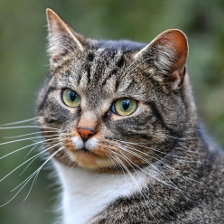

In [5]:
load(joinpath(NNHelferlein.DATA_DIR, "elecat_224", "cat-224.png"))

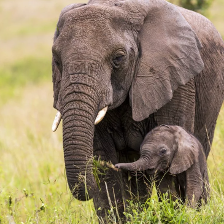

In [6]:
load(joinpath(NNHelferlein.DATA_DIR, "elecat_224", "ele-224.png"))

In [7]:
imgs = mk_image_minibatch(joinpath(NNHelferlein.DATA_DIR, "elecat_224"), 16, train=false, pre_proc=preproc_imagenet)

ImageLoader("/home/andreas/.julia/dev/NNHelferlein/data/elecat_224", ["/home/andreas/.julia/dev/NNHelferlein/data/elecat_224/cat-224.png", "/home/andreas/.julia/dev/NNHelferlein/data/elecat_224/ele-224.png"], [0, 0], ["unknwon_class"], 16, true, [1, 2], false, nothing, NNHelferlein.preproc_imagenet, false, nothing)

In [8]:
pipl = CropRatio(ratio=1.0) |> Resize(224,224)
imgs2 = mk_image_minibatch("../data/elecat", 16, train=false, aug_pipl=pipl, pre_proc=preproc_imagenet)

ImageLoader("../data/elecat", ["../data/elecat/cat.jpg", "../data/elecat/elephant.jpg"], [0, 0], ["unknwon_class"], 16, true, [1, 2], false, 2-step Augmentor.ImmutablePipeline:
 1.) Crop to 1:1 aspect ratio
 2.) Resize to 224×224, NNHelferlein.preproc_imagenet, false, nothing)

In [9]:
x = first(imgs2)

224×224×3×2 KnetArray{Float32, 4}:
[:, :, 1, 1] =
 -32.939  -32.939  -32.939  -32.939  …  -52.939  -50.939  -49.939  -47.939
 -30.939  -32.939  -31.939  -32.939     -48.939  -46.939  -49.939  -47.939
 -30.939  -29.939  -29.939  -29.939     -46.939  -45.939  -45.939  -44.939
 -28.939  -30.939  -29.939  -28.939     -45.939  -43.939  -45.939  -43.939
 -28.939  -30.939  -30.939  -31.939     -43.939  -42.939  -45.939  -43.939
 -30.939  -29.939  -29.939  -29.939  …  -42.939  -43.939  -39.939  -39.939
 -30.939  -29.939  -29.939  -29.939     -42.939  -40.939  -37.939  -37.939
 -30.939  -30.939  -30.939  -31.939     -39.939  -39.939  -36.939  -35.939
 -31.939  -33.939  -31.939  -32.939     -35.939  -35.939  -35.939  -33.939
 -30.939  -30.939  -31.939  -32.939     -31.939  -31.939  -33.939  -32.939
 -31.939  -30.939  -32.939  -32.939  …  -32.939  -32.939  -32.939  -32.939
 -28.939  -32.939  -32.939  -32.939     -30.939  -30.939  -30.939  -30.939
 -30.939  -31.939  -32.939  -32.939     -27.939  -

In [10]:
vgg(x)

1000×2 Knet.KnetArrays.KnetMatrix{Float32}:
 -0.943091   3.18407
  0.595222  -1.23398
 -3.17589   -2.33638
 -1.60362    0.242172
 -3.46837    0.597707
 -1.15418    1.97641
 -4.69582    2.35277
 -0.963701   3.0539
 -1.41863    6.43479
 -0.58274    7.26895
 -1.79205   -0.306694
 -1.54513   -1.07861
 -0.450113   3.06804
  ⋮         
  2.04914   -0.724829
  1.49218   -1.20167
 -1.25289   -1.25547
 -1.87782   -1.33352
 -4.32851   -1.70877
 -3.52054    1.7223
 -3.69288    0.235915
 -2.93325    1.94629
 -2.93133    1.86254
 -2.48813    2.59175
  7.42643    1.07244
  4.78824   -0.393576

Use predict from NNHelferlein-Package:   
(ImageNet class-numbers differs by 1, because they are 0..999)

In [11]:
y = predict_imagenet(vgg, imgs2)

top-5 hits for sample 1: [387, 102, 386, 347, 24]
softmax       #   class label
   0.00     387   " 386: 'African elephant, Loxodonta africana'"
   0.00     102   " 101: 'tusker'"
   0.00     386   " 385: 'Indian elephant, Elephas maximus'"
   0.00     347   " 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis'"
   0.00      24   " 23: 'vulture'"
 
top-5 hits for sample 2: [283, 282, 286, 288, 723]
softmax       #   class label
   0.00     283   " 282: 'tiger cat'"
   0.00     282   " 281: 'tabby, tabby cat'"
   0.00     286   " 285: 'Egyptian cat'"
   0.00     288   " 287: 'lynx, catamount'"
   0.00     723   " 722: 'ping-pong ball'"
 


1000×2 Matrix{Float32}:
 5.11482f-7  2.50409f-9
 6.16732f-9  1.16609f-8
 2.048f-9    2.68508f-10
 2.69886f-8  1.29355f-9
 3.85112f-8  2.00417f-10
 1.52879f-7  2.02757f-9
 2.22741f-7  5.87302f-11
 4.49053f-7  2.45301f-9
 1.32007f-5  1.55642f-9
 3.03998f-5  3.59045f-9
 1.55887f-8  1.0714f-9
 7.204f-9    1.37148f-9
 4.5545f-7   4.09965f-9
 ⋮           
 1.02616f-8  4.99067f-8
 6.36982f-9  2.85939f-8
 6.03621f-9  1.83698f-9
 5.58299f-9  9.83341f-10
 3.83617f-9  8.47975f-11
 1.18574f-7  1.9023f-10
 2.68202f-8  1.60115f-10
 1.48343f-7  3.42242f-10
 1.36426f-7  3.429f-10
 2.82872f-7  5.34131f-10
 6.19101f-8  1.08015f-5
 1.42915f-8  7.72213f-7